No handles with labels found to put in legend.


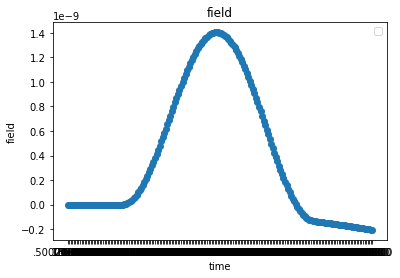

In [1]:
import matplotlib.pyplot as plt
import csv
import pandas as pd

x = []
y = []

with open('../Run_1/20km/fields2_100.csv','r') as csvfile:
	plots = csv.reader(csvfile, delimiter = ',')
	#csvreader is usually used to read text, for numbers use pandas
	
	for row in plots:
		x.append(row[0])
		y.append(float(row[2]))

plt.scatter(x, y)
plt.xlabel('time')
plt.ylabel('field')
plt.title('field')
plt.legend()
plt.show()


In [2]:
import pandas as pd

file1=pd.read_csv('../alf2d/Fields_240809/fields2_900.csv',header=None)
file2=pd.read_csv('../Run_1/20km/fields2_100.csv',header=None)

print(file1.head()) #head printes only the fiest five lines
print(file2.head())
#pandas normally reads the fist row as header, hence header=none

      0    1    2    3    4
0  0.05  0.0  0.0  0.0  0.0
1  0.10  0.0  0.0  0.0  0.0
2  0.15  0.0  0.0  0.0  0.0
3  0.20  0.0  0.0  0.0  0.0
4  0.25  0.0  0.0  0.0  0.0
      0              1              2              3              4
0  0.05   0.000000e+00   0.000000e+00   0.000000e+00   0.000000e+00
1  0.10  1.190650e-256  2.960390e-266   0.000000e+00 -1.050380e-263
2  0.15  3.592890e-205  4.572040e-213 -2.908490e-214 -7.733490e-211
3  0.20  5.222080e-177  1.319860e-184  1.586470e-185  2.345190e-182
4  0.25  1.859870e-156  7.047440e-164  4.902790e-164  4.598900e-161


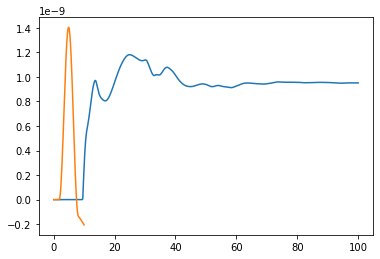

In [3]:
#print(file1.columns)
plot1=plt.plot(file1[0],file1[2])
plot2=plt.plot(file2[0],file2[2])
plt.savefig('test1.png')

In [4]:
file2.describe()

,0,1,2,3,4
count,200.000000,200.000000,2.000000e+02,2.000000e+02,2.000000e+02
mean,5.025000,0.000682,3.887599e-10,-2.003296e-09,-1.027930e-10
std,2.893959,0.000651,5.560371e-10,2.822926e-09,1.488383e-09
min,0.050000,0.000000,-2.058790e-10,-7.190110e-09,-2.844390e-09
25%,2.537500,0.000225,-4.316075e-12,-4.603065e-09,-1.030860e-09
50%,5.025000,0.000328,9.105570e-11,-4.249565e-10,7.865625e-13
75%,7.512500,0.001277,9.025902e-10,3.733635e-11,5.759220e-10
max,10.000000,0.001875,1.404660e-09,9.698390e-10,2.407980e-09


In [5]:
for i in range(1,10):
    j=i*100
    fname='../Run_1/20km/Fields_240809/fields2_'+str(j)+'.csv'
    file1=pd.read_csv(fname,header=None)
    print(fname)

../Run_1/20km/Fields_240809/fields2_100.csv
../Run_1/20km/Fields_240809/fields2_200.csv
../Run_1/20km/Fields_240809/fields2_300.csv
../Run_1/20km/Fields_240809/fields2_400.csv
../Run_1/20km/Fields_240809/fields2_500.csv
../Run_1/20km/Fields_240809/fields2_600.csv
../Run_1/20km/Fields_240809/fields2_700.csv
../Run_1/20km/Fields_240809/fields2_800.csv
../Run_1/20km/Fields_240809/fields2_900.csv


In [6]:
from scipy.fft import fft, ifft
import numpy as np

C:\Users\Khilav\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


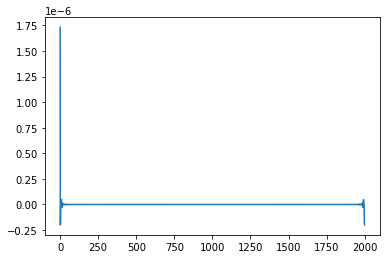

In [7]:
x=np.array(file1[2])
y=fft(x)
plt.plot(y)

In [8]:
print(y.shape)

(2000,)


In [9]:
print(file1[2].shape)

(2000,)


In [10]:
x1=np.fft.fft(file1[2])
x2=np.fft.fft(file2[2])
print(x1)
print(y)

[ 1.73234529e-06+0.00000000e+00j -2.00121837e-07+2.53269123e-08j
 -1.87955033e-07+1.54429391e-07j ... -5.50630567e-08-1.67805467e-07j
 -1.87955033e-07-1.54429391e-07j -2.00121837e-07-2.53269123e-08j]
[ 1.73234529e-06-0.00000000e+00j -2.00121837e-07+2.53269123e-08j
 -1.87955033e-07+1.54429391e-07j ... -5.50630567e-08-1.67805467e-07j
 -1.87955033e-07-1.54429391e-07j -2.00121837e-07-2.53269123e-08j]


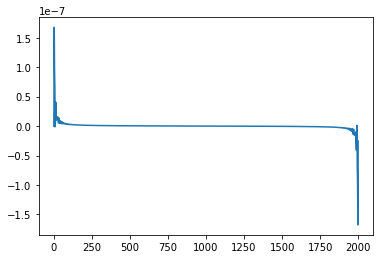

In [11]:
plt.plot(x1.imag)

In [12]:
np.absolute(x1)

array([1.73234529e-06, 2.01718125e-07, 2.43260213e-07, ...,
       1.76608650e-07, 2.43260213e-07, 2.01718125e-07])

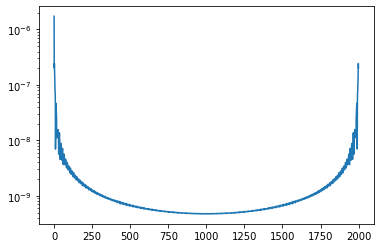

In [13]:
plt.semilogy(np.absolute(x1))

In [14]:
np.set_printoptions(threshold=np.inf)
print(x1)

[ 1.73234529e-06+0.00000000e+00j -2.00121837e-07+2.53269123e-08j
 -1.87955033e-07+1.54429391e-07j -5.50630567e-08+1.67805467e-07j
 -1.00131316e-08+1.20977215e-07j  3.66020429e-09+9.34303706e-08j
  1.32766288e-08+7.85359663e-08j  3.12084437e-08+6.62359306e-08j
  4.69525243e-08+1.95665436e-08j  6.86513362e-09-1.22939286e-09j
 -9.93737997e-09+4.65640993e-09j -2.40181147e-08+1.06439840e-08j
 -2.78729204e-08+3.73628683e-08j -5.17170134e-09+4.06119429e-08j
  2.02942506e-09+3.35871932e-08j  6.10221404e-09+2.93901223e-08j
  1.25661410e-08+2.23028695e-08j  6.34431728e-09+9.96497986e-09j
  1.99242534e-10+1.11735915e-08j -1.20802952e-09+1.19759558e-08j
 -2.19962473e-09+1.17212921e-08j -4.42874278e-09+1.21727371e-08j
 -3.56514113e-09+1.48429897e-08j -2.25243187e-09+1.43438151e-08j
 -2.18496866e-09+1.39818835e-08j -2.16621778e-09+1.49318502e-08j
  1.07976035e-09+1.55458780e-08j  2.39590270e-09+1.28057152e-08j
  2.59293926e-09+1.11854745e-08j  3.19832904e-09+9.28253912e-09j
  2.04868753e-09+5.271587

In [15]:
x1=np.fft.fft(file1[1])
n1=x1.size
timestep=1.0E-3
freq=np.fft.fftfreq(n1,d=timestep)

x2=np.fft.fft(file2[1])
n2=x2.size
timestep=1.0E-3
freq2=np.fft.fftfreq(n2,d=timestep)

#x1=np.fft.fftshift(x1)
#freq=np.fft.fftshift(freq)

#x2=np.fft.fftshift(x2)
#freq2=np.fft.fftshift(freq2)

p1=freq>=0
p2=freq2>=0

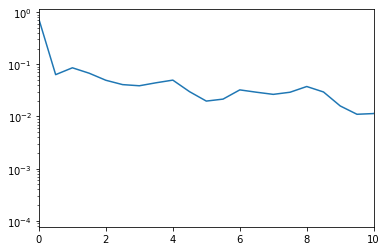

In [16]:
plt.xlim([0,10])
plot3=plt.semilogy(freq[p1],np.absolute(x1[p1]))
plt.show()

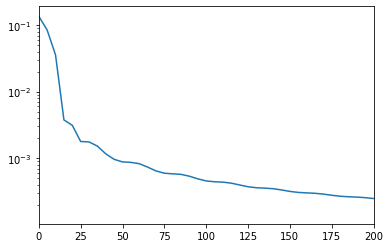

In [17]:
plt.xlim([0,200])
plot4=plt.semilogy(freq2[p2],np.absolute(x2[p2]))
plt.show()

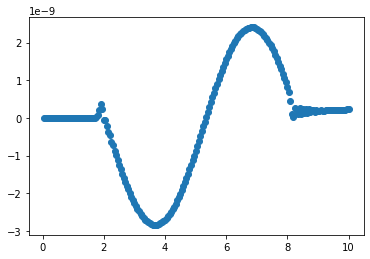

In [31]:
plt.scatter(file2[0],file2[4])
plt.savefig('test2.png')